In [1]:
## import 
import os
import lmdb
import caffe
import numpy as np
from PIL import Image
# import matplotlib.pyplot as plt
from matplotlib import pyplot
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
import cv2

In [2]:
os.getcwd()

'/home/wyw/workspace/SC-2019/intel_firstTest/new-3-3/caffe/examples/vsp'

In [3]:
## LMDB采用键值对<key-value>的存储格式，key就是字符形式的ID，value是Caffe中Datum类的序列化形式。

In [6]:
test = Image.open("/media/wywdisk/VSPdata/data/layer2_1-90_rightPML/vz_split/1.png").convert("RGB").resize( (256,256), Image.BICUBIC )

test = transforms.ToTensor()(test)
# test = transforms.Normalize((test[0].mean(), test[1].mean(), test[2].mean()), (test[0].std(), test[1].std(), test[2].std()))(test)
# test = transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))(test)
test = transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))(test)

In [7]:
test.size()

torch.Size([3, 256, 256])

In [8]:
print( test[0].mean(), test[0].std(),test[0].max(), test[0].min() )
print( test[1].mean(), test[1].std(),test[1].max(), test[1].min() )
print( test[2].mean(), test[2].std(),test[2].max(), test[2].min() )
print( test.mean(), test.std(),test.max(), test.min() )

tensor(-0.6897) tensor(0.2551) tensor(1.) tensor(-0.8431)
tensor(0.0917) tensor(0.2414) tensor(1.) tensor(-1.)
tensor(0.0572) tensor(0.1508) tensor(0.1843) tensor(-0.8275)
tensor(-0.1803) tensor(0.4227) tensor(1.) tensor(-1.)


In [9]:
# img = cv2.imread("/media/wywdisk/VSPdata/data/layer2_1-90_rightPML/vz_split/1.png")
# # cv2.namedWindow("Image")
# cv2.imshow("Image",img)

test :  torch.Size([3, 256, 256]) 	 [tensor(-1.), tensor(1.)]


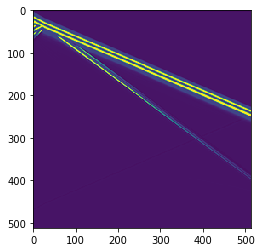

In [10]:
obj = 'test'
print(obj, ": ", eval(obj).shape, "\t", [eval(obj).min(), eval(obj).max()] )
im = plt.imshow(eval(obj)[0,:,:], extent=[0, 512, 512,0])
#plt.colorbar(im)
# plt.title("B: The input")

In [ ]:
# random.random()

In [ ]:
# sizeHW = 32
# Channel = 3
# outName = 'layer2_vz_28-4590-int-cifarForm_train_lmdb'

In [11]:
# sizeHW = 64
# Channel = 3
data_float = True#False
image_type = 0# 0 cifar; 1 mnists
if image_type == 0: #cifar
    sizeHW = 256
    Channel = 3
    if data_float :
        outName = "layer2_vz_" + str(sizeHW) + "-4590-float-cifarForm_train_lmdb"
#         outName = 'layer2_vz_28-4590-float-cifarForm_train_lmdb'
    if not data_float:
        outName = "layer2_vz_" + str(sizeHW) + "-4590-int-cifarForm_train_lmdb"
#         outName = 'layer2_vz_28-4590-int-cifarForm_train_lmdb'
if image_type == 1: #mnist
    sizeHW = 28
    Channel = 1
    if data_float :
        outName = "layer2_vz_" + str(sizeHW) + "-4590-float-mnistForm_train_lmdb"
#         outName = 'layer2_vz_28-4590-float-mnistForm_train_lmdb'
    if not data_float:
        outName = "layer2_vz_" + str(sizeHW) + "-4590-int-mnistForm_train_lmdb"
#         outName = 'layer2_vz_28-4590-int-mnistForm_train_lmdb'

print(outName)    

layer2_vz_256-4590-float-cifarForm_train_lmdb


In [12]:
def get_this_pic(datapath, index, Channel, data_float):
    
    name = datapath + "/" + str(index) + ".png"
    if data_float:
        if Channel == 1:
            target = Image.open(name).convert("L").resize( (sizeHW, sizeHW), Image.BICUBIC )
            target = transforms.ToTensor()(target)
            return transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(target)
    #          return np.array(target)
        elif Channel == 3:
            target = Image.open(name).convert("RGB").resize( (sizeHW, sizeHW), Image.BICUBIC )
            target = transforms.ToTensor()(target)
            return transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(target)
#             return np.array(target).transpose(2,0,1)
    if not data_float: ## int
        if Channel == 1:
            target = Image.open(name).convert("L").resize( (sizeHW, sizeHW), Image.BICUBIC )
#             target = transforms.ToTensor()(target)
#             return transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(target)
            return np.array(target)
        elif Channel == 3:
            target = Image.open(name).convert("RGB").resize( (sizeHW, sizeHW), Image.BICUBIC )
    #     target = transforms.ToTensor()(target).int()
    #     return transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(target)
            return np.array(target).transpose(2,0,1)

In [13]:
## datapath
# datapath = "/media/wywdisk/VSPdata/data/layer4/vz_split"
# datapath = "/media/wywdisk/VSPdata/data/layer3/vz_split"
datapath = "/media/wywdisk/VSPdata/data/layer2_1-90_rightPML/vz_split"

# datapath = "/media/wywdisk/VSPdata/data/layer4/div_split"
# datapath = "/media/wywdisk/VSPdata/data/layer3/div_split"
# datapath = "/media/wywdisk/VSPdata/data/layer2_1-90_rightPML/div_split"

# datapath = "/media/wywdisk/VSPdata/data/layer4/paired_pic"
# datapath = "/media/wywdisk/VSPdata/data/layer3/tpaired_pic"
# datapath = "/media/wywdisk/VSPdata/data/layer2_1-90_rightPML/paired_pic"
# datapath = "/home/wyw/data/picData/all_20190122"


In [14]:
## count the number of data
datapath_list = os.listdir(datapath)
datapath_list.sort()
indexNum = len(datapath_list)
print(indexNum)

4590


In [15]:
N = 4590 # indexNum

In [16]:
# X = np.zeros((N, 1, 256, 256), dtype=np.float64)
# y = 0.4 * np.ones(N, dtype=np.float32)
y = 0.4 * np.ones(N, dtype=np.int64)

map_size = N * sizeHW*sizeHW*Channel*8 *3 #X.nbytes * 3
print(map_size)

21658337280


In [17]:
env = lmdb.open(outName, map_size=map_size)

In [18]:
with env.begin(write=True) as txn:
    # txn is a Transaction object
    for i in range(N):
        ## readin data to Xi
        if data_float: # tensor
            if Channel == 3:
                Xi = get_this_pic(datapath, i+1, Channel, data_float)
                datum = caffe.proto.caffe_pb2.Datum()
                datum.channels = Channel#Xi.size()[0]# X.shape[1]
                datum.height = Xi.shape[1] #Xi.size()[1]#Xi.size[0] #X.shape[2]
                datum.width = Xi.shape[2] #Xi.size()[2]#Xi.size[1] #X.shape[3]
#                 datum.data = Xi.tobytes()#Xi.numpy().tobytes() #X[i].tobytes()  # or .tostring() if numpy < 1.9
                datum.float_data.extend(Xi.numpy().astype(float).flat)
                datum.label = int(y[i])
                str_id = '{:08}'.format(i)

                # The encode is only essential in Python 3
                txn.put(str_id.encode('ascii'), datum.SerializeToString())
            if Channel == 1:
                Xi = get_this_pic(datapath, i+1, Channel, data_float)
                datum = caffe.proto.caffe_pb2.Datum()
                datum.channels = Channel#Xi.size()[0]# X.shape[1]
                datum.height = Xi.size()[1]#Xi.size[0] #X.shape[2]
                datum.width = Xi.size()[2]#Xi.size[1] #X.shape[3]
    #             datum.float_data.extend = Xi.numpy() .tobytes() #X[i].tobytes()  # or .tostring() if numpy < 1.9
                datum.float_data.extend(Xi.numpy().astype(float).flat)
                datum.label = int(y[i])
                str_id = '{:08}'.format(i)

                # The encode is only essential in Python 3
                txn.put(str_id.encode('ascii'), datum.SerializeToString())
                
        if not data_float:
            if Channel == 3:
                Xi = get_this_pic(datapath, i+1, Channel, data_float)
                datum = caffe.proto.caffe_pb2.Datum()
                datum.channels = Channel#Xi.size()[0]# X.shape[1]
                datum.height = Xi.shape[1] #Xi.size()[1]#Xi.size[0] #X.shape[2]
                datum.width = Xi.shape[2] #Xi.size()[2]#Xi.size[1] #X.shape[3]
                datum.data = Xi.tobytes()#Xi.numpy().tobytes() #X[i].tobytes()  # or .tostring() if numpy < 1.9
                datum.label = int(y[i])
                str_id = '{:08}'.format(i)

                # The encode is only essential in Python 3
                txn.put(str_id.encode('ascii'), datum.SerializeToString())
            if Channel == 1:
                Xi = get_this_pic(datapath, i+1, Channel, data_float)
                datum = caffe.proto.caffe_pb2.Datum()
                datum.channels = Channel#Xi.size()[0]# X.shape[1]
                datum.height = Xi.size()[1]#Xi.size[0] #X.shape[2]
                datum.width = Xi.size()[2]#Xi.size[1] #X.shape[3]
                datum.data = Xi.numpy().tobytes() #X[i].tobytes()  # or .tostring() if numpy < 1.9
#                 datum.float_data.extend(Xi.numpy().astype(float).flat)
                datum.label = int(y[i])
                str_id = '{:08}'.format(i)

                # The encode is only essential in Python 3
                txn.put(str_id.encode('ascii'), datum.SerializeToString())
        

In [ ]:
env = lmdb.open(outName, readonly=True)
# with env.begin() as txn:
#     raw_datum = txn.get(b'00000000')

# datum = caffe.proto.caffe_pb2.Datum()
# datum.ParseFromString(raw_datum)

# flat_x = np.fromstring(datum.data, dtype=np.float64)
# x = flat_x.reshape(datum.channels, datum.height, datum.width)
# y = datum.label

with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
#         print(key, value)
        print( 'key: ',key)
        datum = caffe.proto.caffe_pb2.Datum() #datum类型
        datum.ParseFromString(value) #转成datum
        flat_x = np.array(datum.float_data).astype(float)
#         flat_x = np.fromstring(datum.data, dtype=np.uint8) #转成numpy类型
        x = flat_x.reshape(datum.channels, datum.height, datum.width)
#         x = flat_x.reshape( datum.height, datum.width,datum.channels)
        y = datum.label#图片的label
        fig = pyplot.figure()#把两张图片显示出来    
        pyplot.imshow(x[0,:,:], cmap='gray')
#         pyplot.imshow(x, cmap='gray')
        break

In [ ]:
x.mean()

In [ ]:
# plt.imshow(x)

In [ ]:
# with env.begin() as txn:
#     cursor = txn.cursor()
#     for key, value in cursor:
#         print(key, value)